In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from PIL import Image
from google.colab import drive
from tensorflow.keras import models, layers
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

metadata_file_path = '/content/drive/MyDrive/hamarchive/HAM10000_metadata.csv'
dataset_folder = '/content/drive/MyDrive/hamarchive/HAM10000_images_part_1'

data = pd.read_csv(metadata_file_path)



Mounted at /content/drive


In [ ]:
data = data.drop(columns=['lesion_id', 'image_id', 'dx_type', 'age', 'sex', 'localization'])
label_encoder = LabelEncoder()
data['dx'] = label_encoder.fit_transform(data['dx'])

subset_size = 2100
image_files = os.listdir(dataset_folder)[:subset_size]
real_images = []
for file in image_files:
    image_path = dataset_folder + '/' + file
    image = load_img(image_path, target_size=(32, 32))
    image_array = img_to_array(image)
    real_images.append(image_array)

real_images = np.array(real_images)
real_images = real_images / 255.0
real_images = real_images.reshape(-1, 32, 32, 3)

generated_images = np.random.normal(0, 1, size=(subset_size, 100))

generator = models.Sequential()
generator.add(layers.Dense(128 * 8 * 8, input_dim=100))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Reshape((8, 8, 128)))
generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='sigmoid'))

discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(32, 32, 3)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

gan_input = layers.Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

batch_size = 128
epochs = 20
steps_per_epoch = real_images.shape[0] // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        generated_images = generator.predict(noise)
        real_images_batch = real_images[np.random.randint(0, real_images.shape[0], size=batch_size)]
        X = np.concatenate([real_images_batch, generated_images])
        y = np.zeros(2 * batch_size)
        y[:batch_size] = 1
        discriminator.trainable = True
        discriminator.train_on_batch(X, y)
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)
    print(f"Epoch {epoch + 1}/{epochs} completed")

test_noise = np.random.normal(0, 1, size=(real_images.shape[0], 100))
generated_images = generator.predict(test_noise)
test_labels = np.zeros(real_images.shape[0])
test_loss, test_acc = discriminator.evaluate(generated_images, test_labels)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 27ms/step
Epoch 1/20 completed
4/4 [==============================] - 0s 27ms/step
Epoch 2/20 completed
4/4 [==============================] - 0s 27ms/step
Epoch 3/20 completed
4/4 [==============================] - 0s 27ms/step
Epoch 4/20 completed
4/4 [==============================] - 0s 27ms/step
Epoch 5/20 completed
4/4 [==============================] - 0s 26ms/step
Epoch 6/20 completed
4/4 [==============================] - 0s 27ms/step
Epoch 7/20 completed
4/4 [==============================] - 0s 28ms/step
Epoch 8/20 completed
4/4 [==============================] - 0s 39ms/step
Epoch 9/20 completed
4/4 [==============================] - 0s 27ms/step
Epoch 10/20 completed
4/4 [==============================] - 0s 27ms/step
Epoch 11/20 completed
4/4 [==============================] - 0s 26ms/step
Epoch 12/20 completed
4/4 [==============================] - 0s 26ms/step
Epoch 13/20 completed
4/4 [==============================] - 0s 30ms/

1/1 [==============================] - 0s 71ms/step


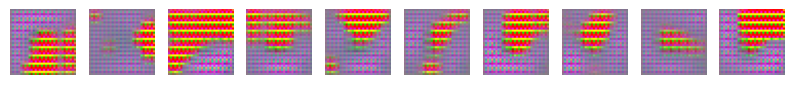

In [ ]:
import matplotlib.pyplot as plt


num_samples = 10
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

1/1 [==============================] - 0s 43ms/step


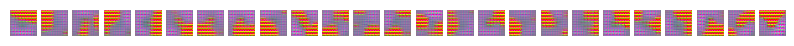

In [ ]:
import matplotlib.pyplot as plt


num_samples = 25
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10,5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import models, layers
from PIL import Image
import os
from google.colab import drive


metadata_file_path = '/content/drive/MyDrive/hamarchive/HAM10000_metadata.csv'
dataset_folder = '/content/drive/MyDrive/hamarchive/HAM10000_images_part_1'



In [ ]:
data = pd.read_csv(metadata_file_path)

data = data.drop(columns=['lesion_id', 'image_id', 'dx_type', 'age', 'sex', 'localization'])
label_encoder = LabelEncoder()
data['dx'] = label_encoder.fit_transform(data['dx'])

subset_size = 2100
image_files = os.listdir(dataset_folder)[:subset_size]
real_images = []

# Create a temporary directory to store resized images
temp_dir = '/content/temp'
os.makedirs(temp_dir, exist_ok=True)

# Save resized real images to the temporary directory
for i, file in enumerate(image_files):
    image_path = dataset_folder + '/' + file
    img = Image.open(image_path)
    img_resized = img.resize((64, 64))
    temp_path = os.path.join(temp_dir, f'real_image_{i}.png')
    img_resized.save(temp_path)
    real_images.append(img_to_array(img_resized))



In [ ]:
# Load resized real images using load_img
real_images = []
for i in range(subset_size):
    img_path = os.path.join(temp_dir, f'real_image_{i}.png')
    if os.path.exists(img_path):
        img_array = img_to_array(load_img(img_path))
        real_images.append(img_array)

# Remove temporary directory and images
for img_path in os.listdir(temp_dir):
    os.remove(os.path.join(temp_dir, img_path))
os.rmdir(temp_dir)

real_images = np.array(real_images) / 255.0

# Generator model
generator = models.Sequential()
generator.add(layers.Dense(8 * 8 * 128, input_dim=100))
generator.add(layers.Reshape((8, 8, 128)))
generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='tanh'))

# Discriminator model
discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

# GAN model
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')



In [ ]:
# Training loop
batch_size = 128
epochs = 20
steps_per_epoch = real_images.shape[0] // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        generated_images = generator.predict(noise)
        real_images_batch = real_images[np.random.randint(0, real_images.shape[0], size=batch_size)]

        X = np.concatenate([real_images_batch, generated_images])
        y = np.zeros(2 * batch_size)
        y[:batch_size] = 1

        discriminator.trainable = True
        discriminator.train_on_batch(X, y)

        noise = np.random.normal(0, 1, size=(batch_size, 100))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)

    print(f"Epoch {epoch + 1}/{epochs} completed")


4/4 [==============================] - 0s 3ms/step
Epoch 1/20 completed
4/4 [==============================] - 0s 4ms/step
Epoch 2/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 3/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 4/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 5/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 6/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 7/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 8/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 9/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 10/20 completed
4/4 [==============================] - 0s 4ms/step
Epoch 11/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 12/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 13/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 14/

In [ ]:
test_noise = np.random.normal(0, 1, size=(real_images.shape[0], 100))
generated_images = generator.predict(test_noise)
test_labels = np.zeros(real_images.shape[0])
test_loss, test_acc = discriminator.evaluate(generated_images, test_labels)
print('Test accuracy:', test_acc)

66/66 [==============================] - 2s 8ms/step - loss: 0.0192 - accuracy: 0.9986
Test accuracy: 0.9985714554786682


In [ ]:
import matplotlib.pyplot as plt


num_samples = 10
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

NameError: name 'np' is not defined

1/1 [==============================] - 0s 29ms/step


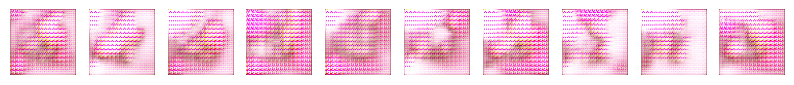

In [ ]:
import matplotlib.pyplot as plt


num_samples = 10
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

In [ ]:
# Generator model
from tensorflow.keras.optimizers import Adam

generator = models.Sequential()
generator.add(layers.Dense(8 * 8 * 128, input_dim=100))
generator.add(layers.Reshape((8, 8, 128)))
generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='tanh'))

# Discriminator model
discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

# Adjust learning rates
generator_optimizer = Adam(learning_rate=0.0002)
discriminator_optimizer = Adam(learning_rate=0.0002)

# Compile discriminator
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

# GAN model
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer=generator_optimizer, loss='binary_crossentropy')


In [ ]:
# Training loop
batch_size = 128
epochs = 20
steps_per_epoch = real_images.shape[0] // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        generated_images = generator.predict(noise)
        real_images_batch = real_images[np.random.randint(0, real_images.shape[0], size=batch_size)]

        X = np.concatenate([real_images_batch, generated_images])
        y = np.zeros(2 * batch_size)
        y[:batch_size] = 1

        discriminator.trainable = True
        discriminator.train_on_batch(X, y)

        noise = np.random.normal(0, 1, size=(batch_size, 100))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)

    print(f"Epoch {epoch + 1}/{epochs} completed")

4/4 [==============================] - 0s 3ms/step
Epoch 1/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 2/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 3/20 completed
4/4 [==============================] - 0s 4ms/step
Epoch 4/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 5/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 6/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 7/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 8/20 completed
4/4 [==============================] - 0s 4ms/step
Epoch 9/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 10/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 11/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 12/20 completed
4/4 [==============================] - 0s 4ms/step
Epoch 13/20 completed
4/4 [==============================] - 0s 3ms/step
Epoch 14/

In [ ]:
test_noise = np.random.normal(0, 1, size=(real_images.shape[0], 100))
generated_images = generator.predict(test_noise)
test_labels = np.zeros(real_images.shape[0])
test_loss, test_acc = discriminator.evaluate(generated_images, test_labels)
print('Test accuracy:', test_acc)

66/66 [==============================] - 1s 5ms/step - loss: 0.0079 - accuracy: 1.0000
Test accuracy: 1.0


1/1 [==============================] - 0s 31ms/step


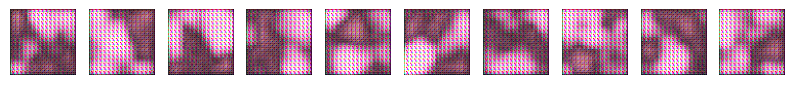

In [ ]:
import matplotlib.pyplot as plt


num_samples = 10
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

In [ ]:
# Generator model
generator = models.Sequential()
generator.add(layers.Dense(8 * 8 * 128, input_dim=100))
generator.add(layers.Reshape((8, 8, 128)))
generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='sigmoid'))

# Discriminator model
discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

# Adjust learning rates
generator_optimizer = Adam(learning_rate=0.002)
discriminator_optimizer = Adam(learning_rate=0.002)

# Compile discriminator
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

# GAN model
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer=generator_optimizer, loss='binary_crossentropy')


In [ ]:
# Training loop
batch_size = 128
epochs = 15
steps_per_epoch = real_images.shape[0] // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        generated_images = generator.predict(noise)
        real_images_batch = real_images[np.random.randint(0, real_images.shape[0], size=batch_size)]

        X = np.concatenate([real_images_batch, generated_images])
        y = np.zeros(2 * batch_size)
        y[:batch_size] = 1

        discriminator.trainable = True
        discriminator.train_on_batch(X, y)

        noise = np.random.normal(0, 1, size=(batch_size, 100))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)

    print(f"Epoch {epoch + 1}/{epochs} completed")

4/4 [==============================] - 0s 3ms/step
Epoch 1/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 2/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 3/15 completed
4/4 [==============================] - 0s 4ms/step
Epoch 4/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 5/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 6/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 7/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 8/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 9/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 10/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 11/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 12/15 completed
4/4 [==============================] - 0s 4ms/step
Epoch 13/15 completed
4/4 [==============================] - 0s 3ms/step
Epoch 14/

In [ ]:
test_noise = np.random.normal(0, 1, size=(real_images.shape[0], 100))
generated_images = generator.predict(test_noise)
test_labels = np.zeros(real_images.shape[0])
test_loss, test_acc = discriminator.evaluate(generated_images, test_labels)
print('Test accuracy:', test_acc)

66/66 [==============================] - 0s 5ms/step - loss: 4.9624 - accuracy: 0.0571
Test accuracy: 0.05714285746216774


1/1 [==============================] - 0s 19ms/step


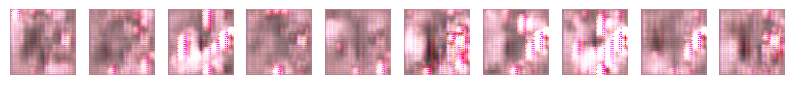

In [ ]:
import matplotlib.pyplot as plt


num_samples = 10
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

In [ ]:
# Generator model
generator = models.Sequential()
generator.add(layers.Dense(8 * 8 * 128, input_dim=100))
generator.add(layers.Reshape((8, 8, 128)))
generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='sigmoid'))

# Discriminator model
discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

# Adjust learning rates
generator_optimizer = Adam(learning_rate=0.0002)
discriminator_optimizer = Adam(learning_rate=0.0002)

# Compile discriminator
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

# GAN model
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer=generator_optimizer, loss='binary_crossentropy')

In [ ]:
# Training loop
batch_size = 128
epochs = 60
steps_per_epoch = real_images.shape[0] // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        generated_images = generator.predict(noise)
        real_images_batch = real_images[np.random.randint(0, real_images.shape[0], size=batch_size)]

        X = np.concatenate([real_images_batch, generated_images])
        y = np.zeros(2 * batch_size)
        y[:batch_size] = 1

        discriminator.trainable = True
        discriminator.train_on_batch(X, y)

        noise = np.random.normal(0, 1, size=(batch_size, 100))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)

    print(f"Epoch {epoch + 1}/{epochs} completed")

4/4 [==============================] - 0s 3ms/step
Epoch 1/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 2/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 3/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 4/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 5/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 6/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 7/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 8/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 9/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 10/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 11/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 12/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 13/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 14/

In [ ]:
test_noise = np.random.normal(0, 1, size=(real_images.shape[0], 100))
generated_images = generator.predict(test_noise)
test_labels = np.zeros(real_images.shape[0])
test_loss, test_acc = discriminator.evaluate(generated_images, test_labels)
print('Test accuracy:', test_acc)

66/66 [==============================] - 0s 3ms/step - loss: 0.1111 - accuracy: 1.0000
Test accuracy: 1.0


1/1 [==============================] - 0s 29ms/step


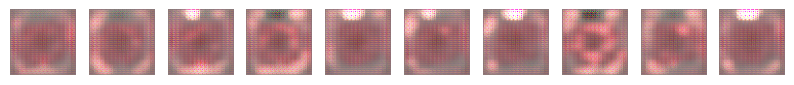

In [ ]:
import matplotlib.pyplot as plt


num_samples = 10
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

In [ ]:
# Generator model
generator = models.Sequential()
generator.add(layers.Dense(8 * 8 * 128, input_dim=100))
generator.add(layers.Reshape((8, 8, 128)))
generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='sigmoid'))

# Discriminator model
discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

# Adjust learning rates
generator_optimizer = Adam(learning_rate=0.00001)
discriminator_optimizer = Adam(learning_rate=0.00001)

# Compile discriminator
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

# GAN model
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer=generator_optimizer, loss='binary_crossentropy')

In [ ]:
# Training loop
batch_size = 128
epochs = 60
steps_per_epoch = real_images.shape[0] // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        generated_images = generator.predict(noise)
        real_images_batch = real_images[np.random.randint(0, real_images.shape[0], size=batch_size)]

        X = np.concatenate([real_images_batch, generated_images])
        y = np.zeros(2 * batch_size)
        y[:batch_size] = 1

        discriminator.trainable = True
        discriminator.train_on_batch(X, y)

        noise = np.random.normal(0, 1, size=(batch_size, 100))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)

    print(f"Epoch {epoch + 1}/{epochs} completed")

4/4 [==============================] - 0s 4ms/step
Epoch 1/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 2/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 3/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 4/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 5/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 6/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 7/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 8/60 completed
4/4 [==============================] - 0s 5ms/step
Epoch 9/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 10/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 11/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 12/60 completed
4/4 [==============================] - 0s 4ms/step
Epoch 13/60 completed
4/4 [==============================] - 0s 3ms/step
Epoch 14/

In [ ]:
test_noise = np.random.normal(0, 1, size=(real_images.shape[0], 100))
generated_images = generator.predict(test_noise)
test_labels = np.zeros(real_images.shape[0])
test_loss, test_acc = discriminator.evaluate(generated_images, test_labels)
print('Test accuracy:', test_acc)

66/66 [==============================] - 0s 3ms/step - loss: 0.7841 - accuracy: 0.0019
Test accuracy: 0.0019047618843615055


1/1 [==============================] - 0s 39ms/step


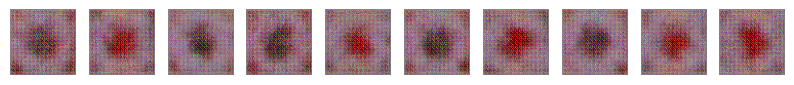

In [ ]:
import matplotlib.pyplot as plt


num_samples = 10
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

In [ ]:


# Generator model
generator = models.Sequential()
generator.add(layers.Dense(8 * 8 * 256, input_dim=100))
generator.add(layers.Reshape((8, 8, 256)))
generator.add(layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='sigmoid'))

# Discriminator model
discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(256, 256, 3)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

# Adjust learning rates
generator_optimizer = Adam(learning_rate=0.0002)
discriminator_optimizer = Adam(learning_rate=0.0002)

# Compile discriminator
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

# GAN model
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer=generator_optimizer, loss='binary_crossentropy')


In [ ]:
# Training loop
from PIL import Image
batch_size = 128
epochs = 20
steps_per_epoch = real_images.shape[0] // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, 100))
        generated_images = generator.predict(noise)
        real_images_batch = real_images[np.random.randint(0, real_images.shape[0], size=batch_size)]

        # Convert images to uint8 data type
        real_images_batch_uint8 = (real_images_batch * 255).astype(np.uint8)

        # Resize real images to the target size
        real_images_batch_resized = np.array([img_to_array(Image.fromarray(img).resize((256, 256))) for img in real_images_batch_uint8])

        X = np.concatenate([real_images_batch_resized, generated_images])
        y = np.zeros(2 * batch_size)
        y[:batch_size] = 1

        discriminator.trainable = True
        discriminator.train_on_batch(X, y)

        noise = np.random.normal(0, 1, size=(batch_size, 100))
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        gan.train_on_batch(noise, y_gen)

    print(f"Epoch {epoch + 1}/{epochs} completed")


4/4 [==============================] - 0s 16ms/step
Epoch 1/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 2/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 3/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 4/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 5/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 6/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 7/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 8/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 9/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 10/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 11/20 completed
4/4 [==============================] - 0s 17ms/step
Epoch 12/20 completed
4/4 [==============================] - 0s 16ms/step
Epoch 13/20 completed
4/4 [==============================] - 0s 16ms/

In [ ]:
test_noise = np.random.normal(0, 1, size=(real_images.shape[0], 100))
generated_images = generator.predict(test_noise)
test_labels = np.zeros(real_images.shape[0])
test_loss, test_acc = discriminator.evaluate(generated_images, test_labels)
print('Test accuracy:', test_acc)


66/66 [==============================] - 2s 27ms/step - loss: 9.0836e-04 - accuracy: 1.0000
Test accuracy: 1.0


1/1 [==============================] - 0s 18ms/step


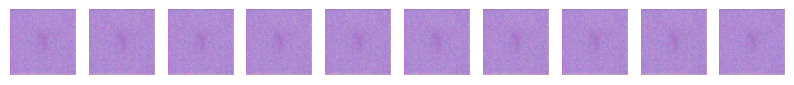

In [ ]:
import matplotlib.pyplot as plt


num_samples = 10
generated_noise = np.random.normal(0, 1, size=(num_samples, 100))
generated_images = generator.predict(generated_noise)


plt.figure(figsize=(10, 1))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()

In [ ]:
# Load resized real images using load_img
real_images = []
for i in range(subset_size):
    img_path = os.path.join(temp_dir, f'real_image_{i}.png')
    if os.path.exists(img_path):
        img_array = img_to_array(load_img(img_path))
        real_images.append(img_array)

# Remove temporary directory and images
for img_path in os.listdir(temp_dir):
    os.remove(os.path.join(temp_dir, img_path))
os.rmdir(temp_dir)

real_images = np.array(real_images) / 255.0


# Updated Generator
generator = models.Sequential()
generator.add(layers.Dense(8 * 8 * 256, input_dim=100))
generator.add(layers.Reshape((8, 8, 256)))
generator.add(layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU(0.2))
generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='tanh'))

# Resize the generated image to (64, 64, 3)
resized_generated_image = layers.Lambda(lambda x: tf.image.resize(x, (64, 64)))(generated_image)

# Updated Discriminator
discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU(0.2))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

# Compile Discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.trainable = False

# Updated GAN model
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
resized_generated_image = layers.Lambda(lambda x: tf.image.resize(x, (64, 64)))(generated_image)
gan_output = discriminator(resized_generated_image)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')



NameError: Exception encountered when calling layer "lambda" (type Lambda).

name 'tf' is not defined

Call arguments received by layer "lambda" (type Lambda):
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • mask=None
  • training=None